# 使用不同优化算法优化梯度下降
## mini-batch、momentum、Adam算法

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import sklearn
import sklearn.datasets
import opt_utils
import testCase
import math

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1-无优化梯度下降（GD）

In [3]:
def update_gd(params,grads,a):
    """梯度下降"""
    L = len(params) // 2
    
    for l in range(L):
        params["W" + str(l+1)] = params["W" + str(l+1)] - a * grads["dW" + str(l+1)]
        params["b" + str(l+1)] = params["b" + str(l+1)] - a * grads["db" + str(l+1)]
        
    return params

In [4]:
# 测试gd
params,grads,a = testCase.update_parameters_with_gd_test_case()
params = update_gd(params,grads,a)
params["W1"],params["b1"]

(array([[ 1.63535156, -0.62320365, -0.53718766],
        [-1.07799357,  0.85639907, -2.29470142]]),
 array([[ 1.74604067],
        [-0.75184921]]))

## 2-mini-batch梯度下降

In [8]:
def random_mini_batches(X,Y,mini_batch_size=64,seed=0):
    """在训练集中随机创建mini-batch列表"""
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    # 打乱训练集顺序
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:,permutation] # 将每一列数据按照permutation的顺序重新排列
    shuffled_Y = Y[:,permutation]
    
    # 分割
    num = math.floor(m / mini_batch_size) # math.floor()向下取整
    for k in range(0,num):
        batch_X = shuffled_X[:,k * mini_batch_size : (k+1) * mini_batch_size]
        batch_Y = shuffled_Y[:,k * mini_batch_size : (k+1) * mini_batch_size]
        
        mini_batch = (batch_X,batch_Y)
        mini_batches.append(mini_batch)
        
    # 处理剩下的训练集
    if m % mini_batch_size != 0:
        batch_X = shuffled_X[:,num * mini_batch_size :]
        batch_Y = shuffled_Y[:,num * mini_batch_size :]
        
        mini_batch = (batch_X,batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [11]:
# 测试random_mini_batches
X_assess,Y_assess,mini_batch_size = testCase.random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess,Y_assess,mini_batch_size)
print(mini_batches[0][0].shape,mini_batches[0][1].shape,mini_batches[1][0].shape)
print(mini_batches[1][1].shape,mini_batches[2][0].shape,mini_batches[2][1].shape)

(12288, 64) (1, 64) (12288, 64)
(1, 64) (12288, 20) (1, 20)


## 3-momentum梯度下降

In [48]:
def init_v(params):
    """初始化参数v"""
    L = len(params) // 2
    v = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros_like(params["W" + str(l+1)])
        v["db" + str(l+1)] = np.zeros_like(params["b" + str(l+1)])
        
    return v

In [13]:
def update_momentum(params,grads,v,beta,a):
    """momentum梯度下降"""
    L = len(params) // 2
    for l in range(L):
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
        
        params["W" + str(l+1)] = params["W" + str(l+1)] - a * v["dW" + str(l+1)]
        params["b" + str(l+1)] = params["b" + str(l+1)] - a * v["db" + str(l+1)]
        
    return params,v

In [15]:
# 测试momentum
params,grads,v = testCase.update_parameters_with_momentum_test_case()
params,v = update_momentum(params,grads,v,beta=0.9,a=0.01)
params["W1"],params["b1"]

(array([[ 1.62544598, -0.61290114, -0.52907334],
        [-1.07347112,  0.86450677, -2.30085497]]),
 array([[ 1.74493465],
        [-0.76027113]]))

## 4-Adam梯度下降

In [52]:
def init_adam(params):
    """初始化v和s"""
    
    L = len(params) // 2
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros_like(params["W" + str(l+1)])
        v["db" + str(l+1)] = np.zeros_like(params["b" + str(l+1)])
        
        s["dW" + str(l+1)] = np.zeros_like(params["W" + str(l+1)])
        s["db" + str(l+1)] = np.zeros_like(params["b" + str(l+1)])
        
    return (v,s)

In [70]:
def update_adam(params,grads,v,s,t,a=0.01,beta1=0.9,beta2=0.999,epsilon=1e-8):
    """Adam梯度下降"""
    L = len(params) // 2
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
        
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - np.power(beta1,t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - np.power(beta1,t))
        
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * np.square(grads["dW" + str(l+1)])
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * np.square(grads["db" + str(l+1)])
        
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - np.power(beta2,t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - np.power(beta2,t))
        
        params["W" + str(l+1)] = params["W" + str(l+1)] - a * (v_corrected["dW" + str(l+1)] / np.sqrt(s_corrected["dW" + str(l+1)] + epsilon))
        params["b" + str(l+1)] = params["b" + str(l+1)] - a * (v_corrected["db" + str(l+1)] / np.sqrt(s_corrected["db" + str(l+1)] + epsilon))
        
    return (params,v,s)

In [71]:
# 测试Adam
params,grads,v,s = testCase.update_parameters_with_adam_test_case()
update_adam(params,grads,v,s,t=2)
params["W1"],params["b1"]

(array([[ 1.63178673, -0.61919778, -0.53561312],
        [-1.08040999,  0.85796626, -2.29409733]]),
 array([[ 1.75225313],
        [-0.75376553]]))

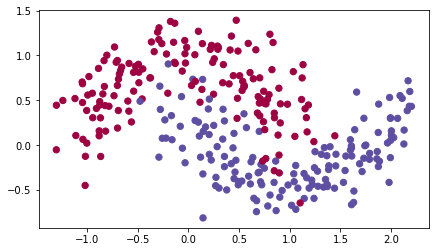

In [38]:
train_X,train_Y = opt_utils.load_dataset(is_plot=True)

In [60]:
def model(X,Y,layers_dims,optimizer,a=0.0007,mini_batch_size=64,beta=0.9,beta1=0.9,beta2=0.999,
          epsilon=1e-8,epochs=10000,isPrint=True,isPlot=True):
    """神经网络模型"""
    L = len(layers_dims)
    costs = []
    t = 0
    seed = 10
    
    # 初始化参数
    params = opt_utils.initialize_parameters(layers_dims)
    
    # 选择优化算法
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = init_v(params)
    elif optimizer == "adam":
        v,s = init_adam(params)
    else:
        exit(1)
        
    # 开始学习
    for i in range(epochs):
        seed = seed + 1 # 每次迭代随机分配mini-batch
        mini_batches = random_mini_batches(X,Y,mini_batch_size,seed)
        
        for mini_batch in mini_batches:
            (batch_X,batch_Y) = mini_batch
            
            # 前向传播
            A3,cache = opt_utils.forward_propagation(batch_X,params)
            
            # 计算损失函数
            cost = opt_utils.compute_cost(A3,batch_Y)
            
            # 反向传播
            grads = opt_utils.backward_propagation(batch_X,batch_Y,cache)
            
            # 更新参数
            if optimizer == "gd":
                params = update_gd(params,grads,a)
            elif optimizer == "momentum":
                params,v = update_momentum(params,grads,v,beta,a)
            elif optimizer == "adam":
                t = t + 1
                params,v,s = update_adam(params,grads,v,s,t,a,beta1,beta2,epsilon)
        
        if i % 100 == 0:
            costs.append(cost)
            if isPrint and i % 1000 == 0:
                print("迭代%d次，误差为%f" % (i,cost))
                
    if isPlot:
        plt.plot(costs)
        plt.xlabel('epochs per 100')
        plt.ylabel('cost')
        plt.title(optimizer)
        plt.show()
        
    return params

### 梯度下降模型测试

迭代0次，误差为0.690736
迭代1000次，误差为0.685273
迭代2000次，误差为0.647072
迭代3000次，误差为0.619525
迭代4000次，误差为0.576584
迭代5000次，误差为0.607243
迭代6000次，误差为0.529403
迭代7000次，误差为0.460768
迭代8000次，误差为0.465586
迭代9000次，误差为0.464518


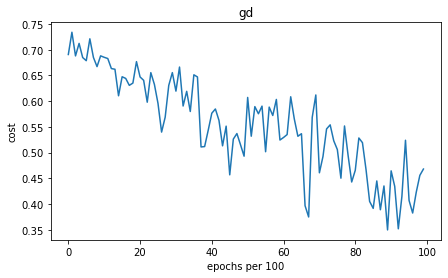

In [45]:
layers_dims = [train_X.shape[0],5,2,1]
params = model(train_X,train_Y,layers_dims,optimizer="gd")

Accuracy: 0.7966666666666666


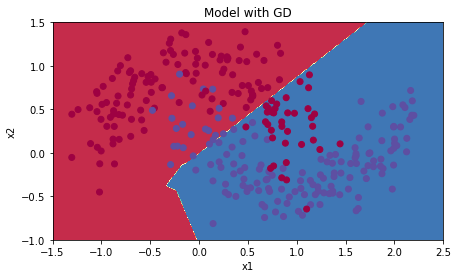

In [46]:
# 预测
pred = opt_utils.predict(train_X,train_Y,params)
# 绘制分类图
plt.title("Model with GD")
ax = plt.gca()
ax.set_xlim([-1.5,2.5])
ax.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,train_Y)

### momentum梯度下降模型测试

迭代0次，误差为0.690741
迭代1000次，误差为0.685341
迭代2000次，误差为0.647145
迭代3000次，误差为0.619594
迭代4000次，误差为0.576665
迭代5000次，误差为0.607324
迭代6000次，误差为0.529476
迭代7000次，误差为0.460936
迭代8000次，误差为0.465780
迭代9000次，误差为0.464740


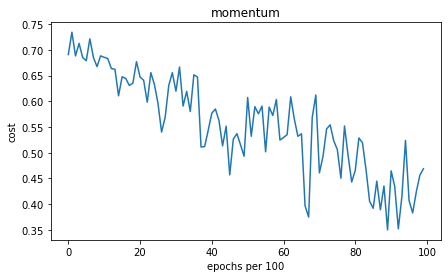

In [49]:
layers_dims = [train_X.shape[0],5,2,1]
params = model(train_X,train_Y,layers_dims,optimizer="momentum")

Accuracy: 0.7966666666666666


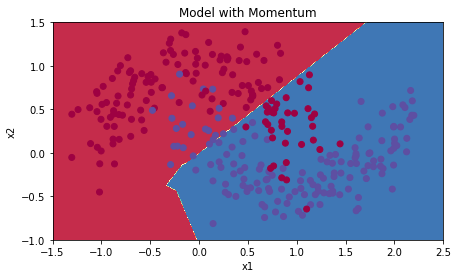

In [50]:
# 预测
pred = opt_utils.predict(train_X,train_Y,params)
# 绘制分类图
plt.title("Model with Momentum")
ax = plt.gca()
ax.set_xlim([-1.5,2.5])
ax.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,train_Y)

### Adam梯度下降模型测试

迭代0次，误差为0.690552
迭代1000次，误差为0.185501
迭代2000次，误差为0.150830
迭代3000次，误差为0.074454
迭代4000次，误差为0.125959
迭代5000次，误差为0.104344
迭代6000次，误差为0.100676
迭代7000次，误差为0.031652
迭代8000次，误差为0.111973
迭代9000次，误差为0.197940


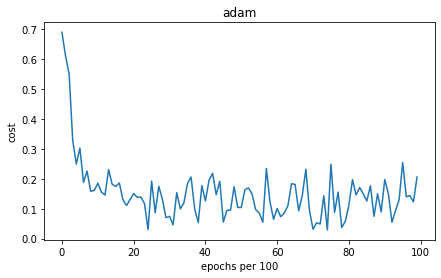

In [72]:
layers_dims = [train_X.shape[0],5,2,1]
params = model(train_X,train_Y,layers_dims,optimizer="adam")

Accuracy: 0.94


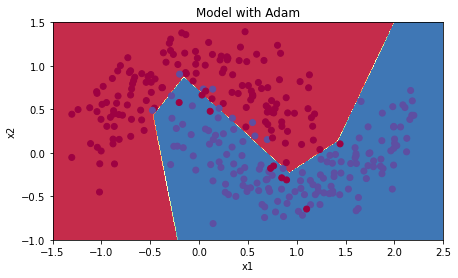

In [73]:
# 预测
pred = opt_utils.predict(train_X,train_Y,params)
# 绘制分类图
plt.title("Model with Adam")
ax = plt.gca()
ax.set_xlim([-1.5,2.5])
ax.set_ylim([-1,1.5])
opt_utils.plot_decision_boundary(lambda x:opt_utils.predict_dec(params,x.T),train_X,train_Y)

## 总结：
## mini-batch和momentum梯度下降可以有更好的效果，但对于小训练集影响很小；
## Adam梯度下降相比之下具有更好的收敛速度和准确率，对内存要求较低